# Feature Selection
Time to exact some audio features! I'm going to be using librosa to collect the following features from each audio clip:
- **mel-frequency spectrogram**: power spectrum of the sound.
- **chroma_features**: descibes the energy of each pitch class.
- **spectral centroid**: sort of like the "center of mass" of the sound, the frequency that the spectrum is centered on.
- **spectral bandwidth**: the width of the band of light at one-half the peak maximum.
- **spectral roll off**: the shape of the signal.
- **zero crossing rate**: measures the smoothness of the signal.
- **mel-frequency cepstral coefficients**: describes the shape of the spectral envelope.

In [1]:
# Import Packages
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import zipfile
# Audio Processing
import librosa
import librosa.feature as lf
import librosa.display as ld
import sounddevice as sd
import soundfile as sf

In [2]:
# open zip files
if 'Data' not in os.listdir():
    with zipfile.ZipFile("Data.zip","r") as zip_ref:
        zip_ref.extractall()

In [3]:
# open the legend
data = pd.read_csv('Data/CSVs/Audio Legend.csv',index_col='Unnamed: 0')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8833 entries, 0 to 8832
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statment  8833 non-null   int64 
 1   emotion   8833 non-null   object
 2   original  8833 non-null   object
 3   sex       8833 non-null   object
 4   path      8833 non-null   object
dtypes: int64(1), object(4)
memory usage: 414.0+ KB


# Get Features
open wav files and save features in a dataframe.

In [4]:
audio = pd.DataFrame()

count = 1
for path in data['path']:
    # get autio and sample rate
    clip, samplerate = sf.read(path)
    
    # mel-frequency spectrogram
    mel_f_spectgrm = lf.melspectrogram(clip,samplerate)
    # chroma_features
    chroma_feature = lf.chroma_stft(clip,samplerate)
    # spectral centroid
    spect_centroid = lf.spectral_centroid(clip,samplerate)
    # spectral bandwidth
    spect_bndwidth = lf.spectral_bandwidth(clip,samplerate)
    # spectral roll off
    spect_roll_off = lf.spectral_rolloff(clip,samplerate)
    # zero crossing rate
    zero_crss_rate = lf.zero_crossing_rate(clip)
    # mel-frequency cepstral coefficients
    mel_f_cepstral = lf.mfcc(clip,samplerate)
    
    # append arrays to a dataframe
    L = [path[-13:], clip, samplerate, mel_f_spectgrm,chroma_feature,spect_centroid,
         spect_bndwidth,spect_roll_off,zero_crss_rate, mel_f_cepstral]
    audio = audio.append([L])
    
    # progress bar
    print('%4d of %4d complete (%d%%)' % (count,len(data['path']),(count/len(data['path']))*100),end='\r')
    count+=1

In [5]:
audio.columns = ['filename','audio','sample rate','mel spectrogram','chroma','centroid',
                 'bandwidth','rolloff','zero crossing rate','mel cepstral']
audio.index = pd.RangeIndex(0,len(audio))
audio.head()

,filename,audio,sample rate,mel spectrogram,chroma,centroid,bandwidth,rolloff,zero crossing rate,mel cepstral
0,Clip_0000.wav,"[0.00531005859375, 0.005157470703125, 0.005401...",16000,"[[0.002243550915605842, 0.011167974521780753, ...","[[0.31399318220161637, 0.3416271876641411, 0.2...","[[2522.6134161928508, 1998.7843664037086, 1773...","[[1970.4314670871852, 1666.9077624560423, 1529...","[[4335.9375, 3843.75, 3554.6875, 2945.3125, 26...","[[0.0830078125, 0.1171875, 0.14013671875, 0.11...","[[-173.28369054296047, -54.43142154347345, -14..."
1,Clip_0001.wav,"[0.002044677734375, -0.000396728515625, -0.001...",16000,"[[0.0011843090924812847, 0.00284435626350834, ...","[[0.873142244877479, 0.7617245975353537, 0.901...","[[1944.9635357769919, 1662.5306186988953, 1536...","[[1662.6882029970106, 1468.4396423162173, 1415...","[[3804.6875, 2875.0, 2742.1875, 2625.0, 2414.0...","[[0.08056640625, 0.10791015625, 0.13427734375,...","[[-189.0959249711305, -135.91434096576927, -11..."
2,Clip_0002.wav,"[0.00640869140625, 0.005157470703125, 0.007354...",16000,"[[0.017193924009822815, 0.030587701900579384, ...","[[0.48194498540707037, 0.241070220799909, 0.18...","[[1783.0493059705661, 1807.4002695442687, 1685...","[[1628.3071970255987, 1593.6216924564785, 1567...","[[3539.0625, 3554.6875, 3148.4375, 2992.1875, ...","[[0.0791015625, 0.10302734375, 0.1259765625, 0...","[[-89.31940528146012, -39.952787188781784, -37..."
3,Clip_0003.wav,"[-0.0062255859375, -0.00537109375, -0.00738525...",16000,"[[0.005225828622143921, 0.01800050464758304, 0...","[[0.2851260909083962, 0.3546149580593427, 0.50...","[[1752.4065607996768, 1717.025603567949, 1598....","[[1690.3358055531166, 1630.1780838776447, 1590...","[[3750.0, 3625.0, 3257.8125, 2554.6875, 2460.9...","[[0.06640625, 0.08447265625, 0.1005859375, 0.0...","[[-110.7964179703168, -51.513890864518146, -37..."
4,Clip_0004.wav,"[-0.008636474609375, -0.0081787109375, -0.0083...",16000,"[[0.0022524330855302273, 0.001286378034361137,...","[[1.0, 1.0, 0.9085244766052083, 1.0, 0.5241527...","[[2398.2330247730106, 1711.9039796925165, 1490...","[[1999.9729775294659, 1657.3374711373249, 1530...","[[4046.875, 3593.75, 2679.6875, 2617.1875, 221...","[[0.06591796875, 0.08984375, 0.103515625, 0.07...","[[-227.00763311580693, -163.90359789125287, -1..."


# Example
Listen to an audio clip and visualize the various features.

In [6]:
# Get a random audio clip
n = np.random.randint(0,len(audio))
test = audio.iloc[n]

print(data.iloc[n].loc[['original','statment','emotion','sex']])
sd.play(test['audio'], test['sample rate'])
status = sd.wait()

original    1039_IEO_SAD_MD.wav
statment                      4
emotion                     sad
sex                        Male
Name: 3111, dtype: object


C:\Users\tarac\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\tarac\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


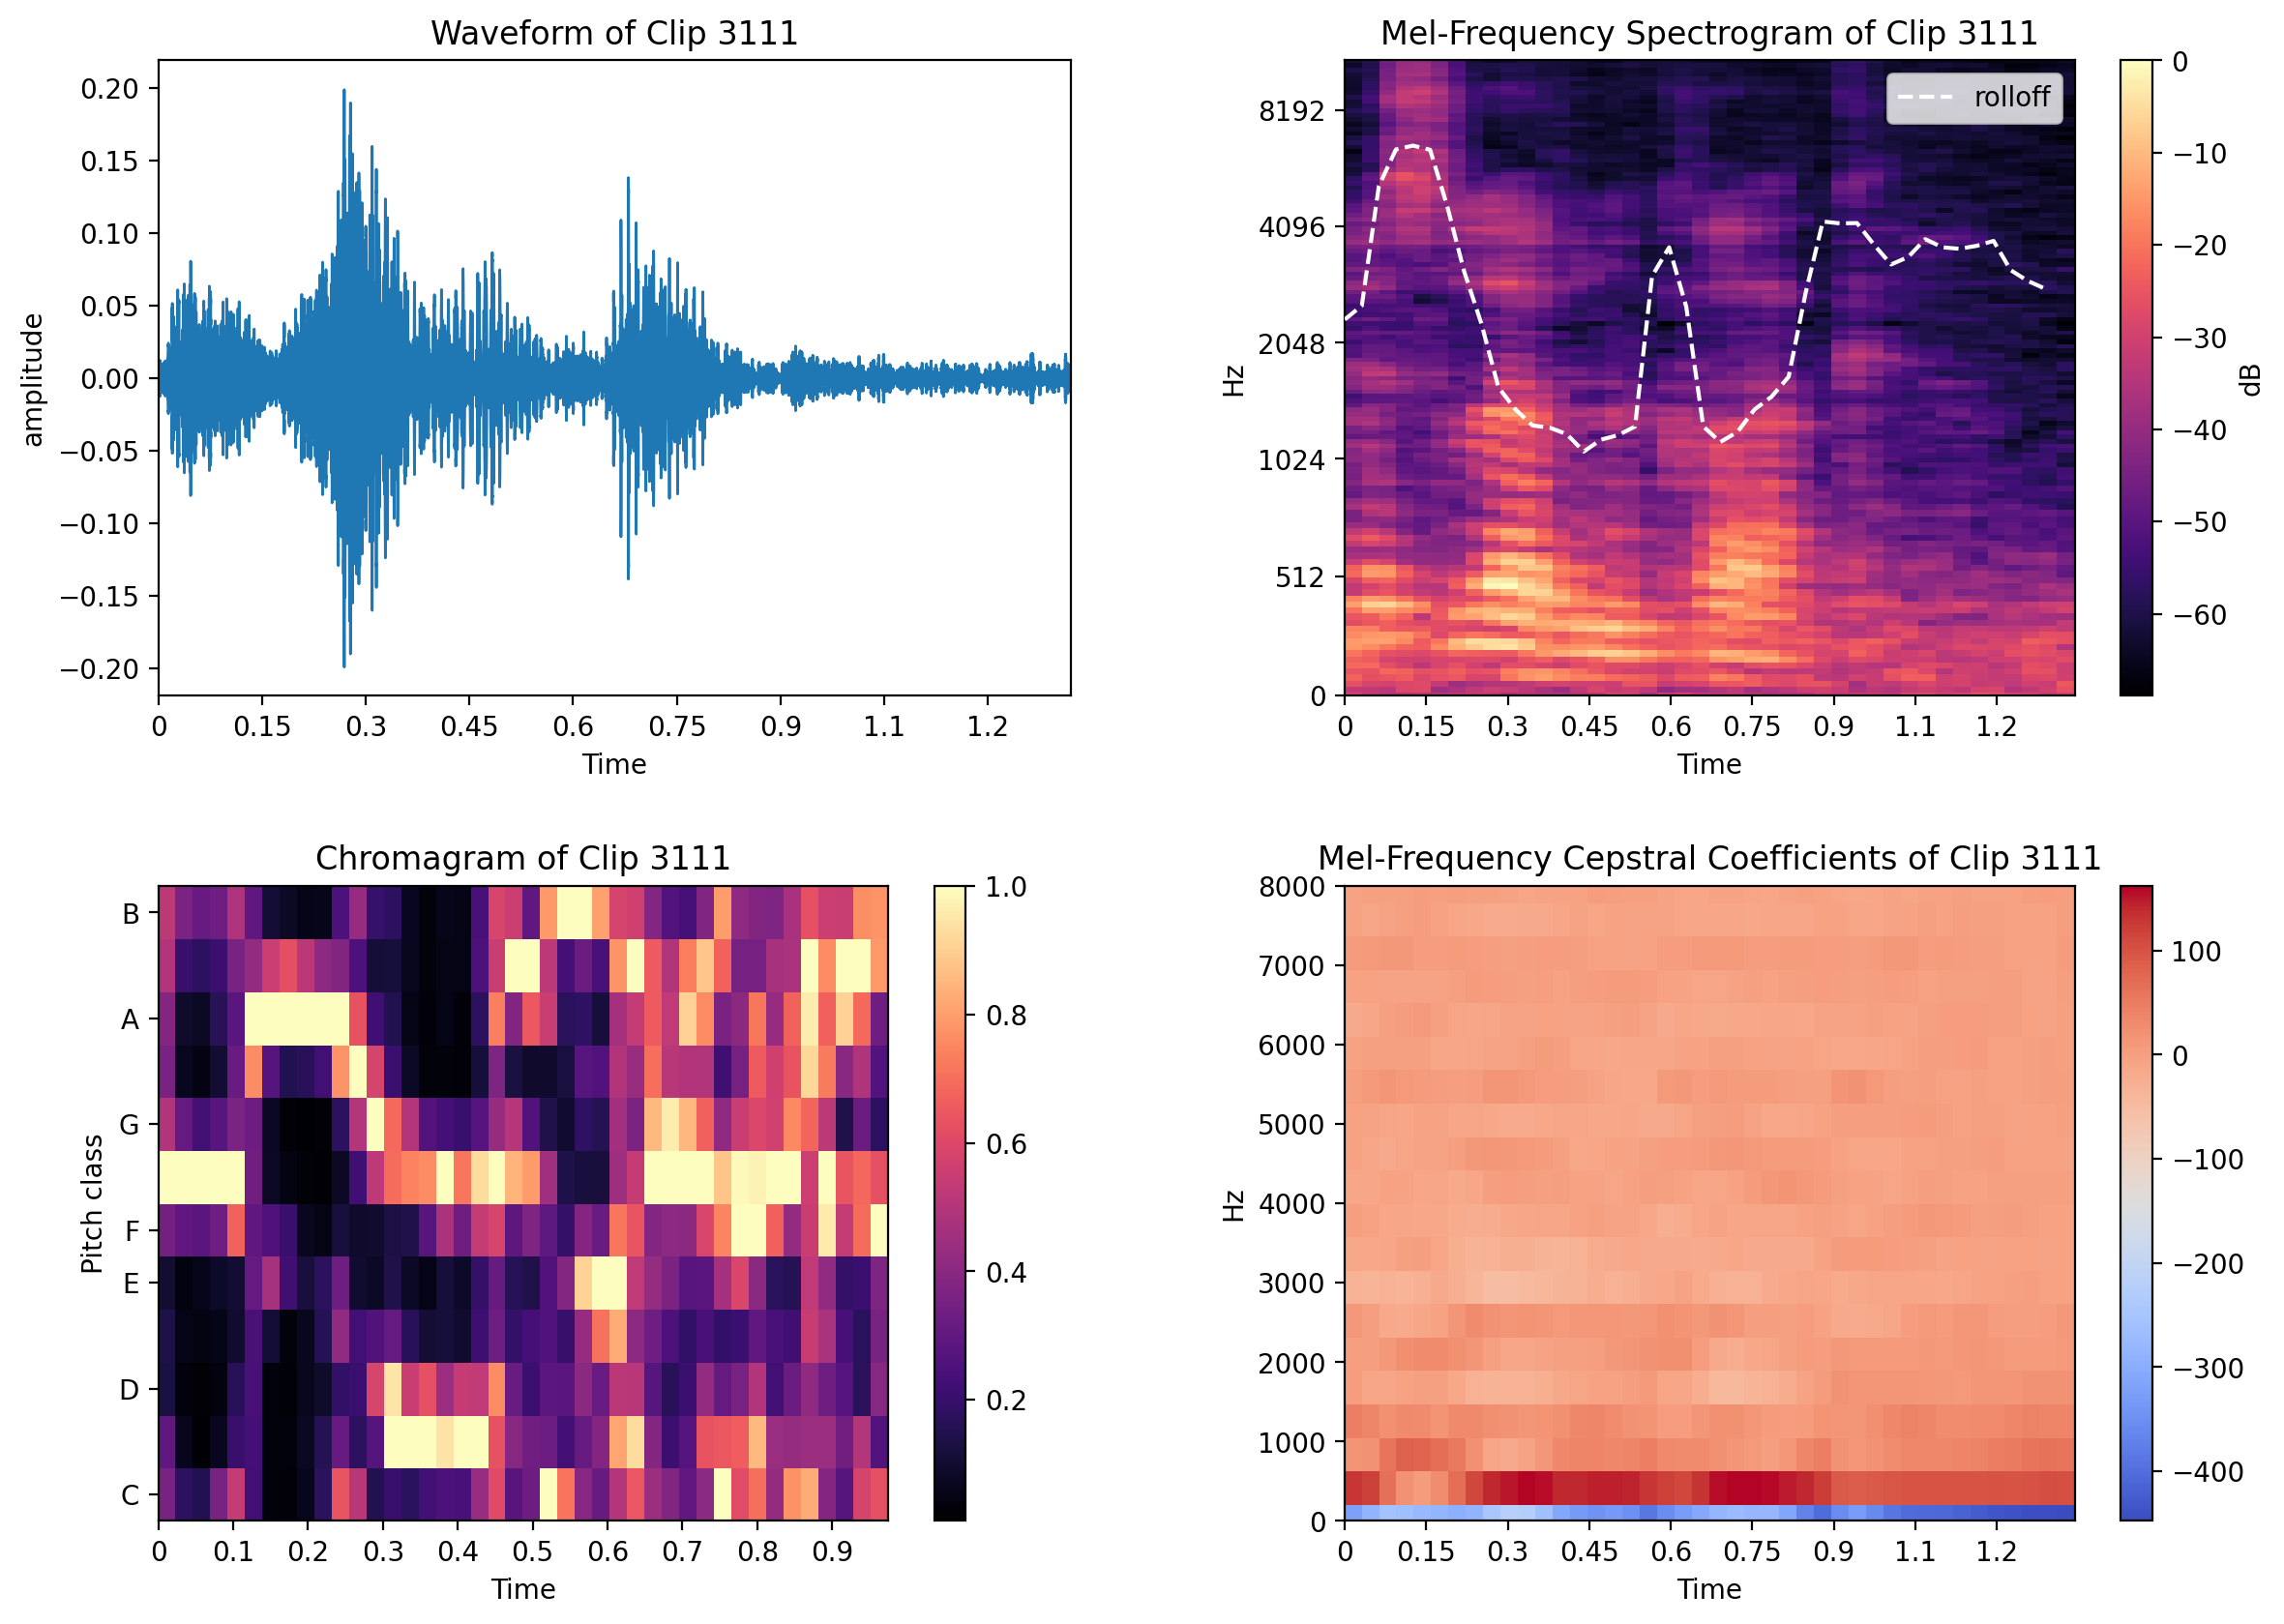

In [7]:
# Set up figures
plt.figure(figsize=(14,10),dpi=200)
plt.subplots_adjust(wspace=0.3,hspace=0.3)

#-- Plot 1 -- Waveform ------------------------------------------------------------------------------------
wave = test['audio']
sample_rate = test['sample rate']

plt.subplot(221)
ld.waveplot(wave, sr=sample_rate)
plt.title('Waveform of Clip %-4d' % n)
plt.ylabel('amplitude')

#-- Plot 2 -- Mel-Frequency Spectrogram & Rolloff ----------------------------------------------------------
# change to decibels
S_dB = librosa.power_to_db(test['mel spectrogram'], ref=np.max)
# get rolloff and time
rolloff = test['rolloff'][0]
max_time = len(wave)/sample_rate
time = np.arange(0,max_time,max_time/len(rolloff))[0:len(rolloff)]

plt.subplot(222)
librosa.display.specshow(data=S_dB,sr=sample_rate, x_axis='time',y_axis='mel')
plt.plot(time,rolloff,zorder=5,c='white',linestyle='--',label='rolloff')
plt.colorbar(label='dB')
plt.title('Mel-Frequency Spectrogram of Clip %-4d' % n)
plt.legend();

#-- Plot 3 -- Mel-Frequency Cepstral Coefficients ----------------------------------------------------------
plt.subplot(224)
ld.specshow(test['mel cepstral'], sr=sample_rate, x_axis='time', y_axis='hz')
plt.title('Mel-Frequency Cepstral Coefficients of Clip %-4d' % n)
plt.colorbar()

#-- Plot 1 -- Chromagram ---------------------------------------------------------------------------------- 
plt.subplot(223)
ld.specshow(test['chroma'], x_axis='time', y_axis='chroma')
plt.title('Chromagram of Clip %-4d' % n)
plt.colorbar();